<a href="https://colab.research.google.com/github/archaajayaram/project/blob/main/Copy_of_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARKS FOUNDATION**

*Data Science And Business Analytics* **(GRIP May 2021)**

TASK 1 : PREDICTION USING SUPERVISED ML

Problem : Predict the percentage of the students based on the number of study hours.


AUTHOR :**ARCHANA JAYARAM**

1.**IMPORTING ALL LIBRARIES REQUIRED**

In [ ]:
#Importing required libraries
import pandas as pd   #For handling dataset
import numpy as np    #For Numerical Calculations
import matplotlib.pyplot as plt  # For Graphical Visualizations 
%matplotlib inline
import seaborn as sns  # For data visualization



2.**READING** **DATASET**

In [ ]:
# Reading data from link
url =r"http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [ ]:
#Printing first 10 rows of the dataset
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#Checking the number of rows and columns
df.shape

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#Check if there any null value in the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

3.**DATA VISUALIZATION**

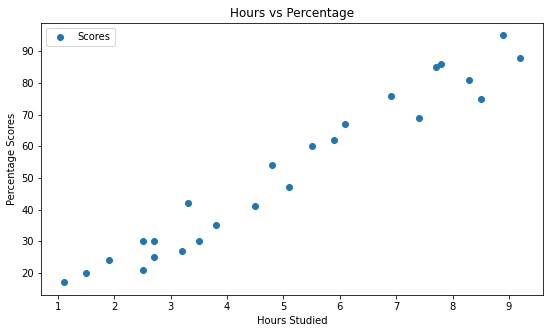

In [ ]:
# Plotting the graph to see the relation and distribution of datapoints.

df.plot(x="Hours", y="Scores",figsize=(9,5),style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.show()

From the above graph we can see that there is a positive linear relation between the number of hours studied and percentage scores.

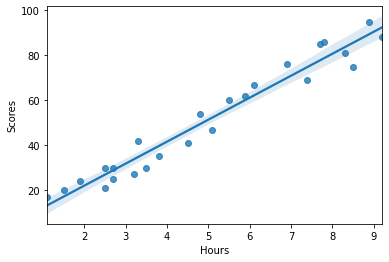

In [ ]:
sns.regplot(x="Hours",y="Scores",data=df)

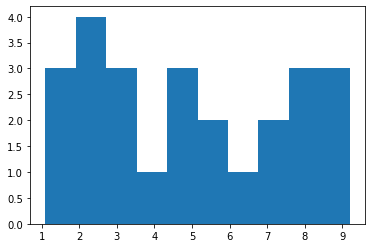

In [ ]:
# Distrubution of Hours data

plt.hist(x="Hours",data=df)
plt.show()

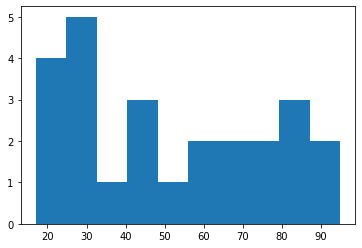

In [ ]:
# Distrubution of Scores data

plt.hist(x="Scores",data=df)
plt.show()

4.**DATA PREPARATION**

In [ ]:
#Dividing the Dataset into "attributes" (inputs) and "labels" (outputs).
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

Split this data into train and test data using train_test_split() method from the scikit learn library

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

5.**TRAINING THE MODEL**



We have to train our data using linear regression algorithm and check the values for test data

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plot the regression line in the scatter plot

In [ ]:
r_line= lr.coef_*X+lr.intercept_  # coefficients and intercepts of data points

Text(0, 0.5, 'Scores')

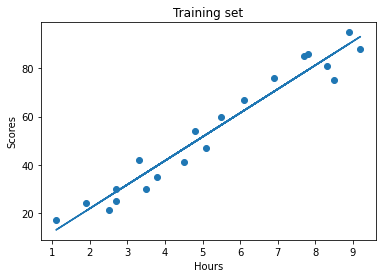

In [ ]:
#Visualizing the Training Dataset

plt.scatter(x_train,y_train)
plt.title('Training set')
plt.plot(x_train,lr.predict(x_train))
plt.xlabel('Hours')
plt.ylabel('Scores')

6.**MAKING PREDICTIONS**

We have done with model training , now we have to make some predictions

In [ ]:
y_pred =lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Compare actual values with predicted values

In [ ]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Score for test data

accuracy=lr.score(x_test, y_test)   
print("Accuracy:",accuracy*100)

Accuracy: 94.54906892105353


**What will be the predicted score if a student studies for 9.25 hours per day?**

In [ ]:
# We can test for any input
# Here we are calculating the score for 9.25 studied hrs 


hours=[[9.25]]
pred = lr.predict(hours)
pred

array([93.69173249])

According to regression,if a student studies for 9.25 hours per day, the score will be 93.69

7.**MODEL EVALUATION**

In this step we have to evaluate the performance of algorithm. We can evaluate this by calculating mean squared error or mean absolute error.

*MEAN  ABSOLUTE  ERROR*


Mean Absolute Error:  4.183859899002982


*MEAN SQUARED ERROR*

In [ ]:
from sklearn import metrics
MSE= metrics.mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",MSE)

Mean Squared Error:  21.598769307217456


Small value of Mean Absolute Error states that the model is quite good

**THANK YOU**.